In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.insert(1, "../..")
from simulations import biological_model
from itertools import product
from prototype_nn import Splitting, predictions, tensor_flatten
import matplotlib.pyplot as plt
import prototype
import torch
%run ../utilities.ipynb

## Training set : Simulations

Here we are simulating data of the biological model to train the neural network.

## Dataframe

The training data is defined below

In [2]:
training_df = pd.DataFrame(data = pd.read_csv("../../data/train/biological_model.csv"))

This is the length of the training data

In [3]:
len(training_df)

256000

Below shows the first 5 rows of the simulated model

In [4]:
training_df.head()

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,initial_x1,initial_x2,initial_x3,initial_x4,initial_x5,initial_x6,initial_x7,initial_x8,initial_x9
0,0.00,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99
1,0.01,1.009309,0.989901,0.970691,0.990099,1.059149,1.029955,1.044315,1.028405,1.000435,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99
2,0.02,1.027462,0.989414,0.952538,0.990586,1.127983,1.069790,1.098370,1.067930,1.012382,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99
3,0.03,1.044490,0.988547,0.935510,0.991453,1.196481,1.109452,1.152183,1.108493,1.025908,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99
4,0.04,1.060427,0.987312,0.919573,0.992688,1.264627,1.148888,1.205770,1.150014,1.041079,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99


The code below is to add another column to the dataframe which is a tuple of all the initial parameters. This would be used for plotting the graphs

In [5]:
training_df['initial_parameters'] = list(zip(training_df.initial_x1, training_df.initial_x2, training_df.initial_x3, 
                                            training_df.initial_x4, training_df.initial_x5, training_df.initial_x6, 
                                            training_df.initial_x7, training_df.initial_x8,
                                            training_df.initial_x9))
training_df.head()

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,initial_x1,initial_x2,initial_x3,initial_x4,initial_x5,initial_x6,initial_x7,initial_x8,initial_x9,initial_parameters
0,0.00,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
1,0.01,1.009309,0.989901,0.970691,0.990099,1.059149,1.029955,1.044315,1.028405,1.000435,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
2,0.02,1.027462,0.989414,0.952538,0.990586,1.127983,1.069790,1.098370,1.067930,1.012382,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
3,0.03,1.044490,0.988547,0.935510,0.991453,1.196481,1.109452,1.152183,1.108493,1.025908,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
4,0.04,1.060427,0.987312,0.919573,0.992688,1.264627,1.148888,1.205770,1.150014,1.041079,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."


We are looking at the x1, x2, x3 ... x4 where the initial parameters are [0.99]

In [6]:
initial = training_df[training_df["initial_parameters"] == (0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99)]

This is the graph shown below

<AxesSubplot:xlabel='x2', ylabel='x9'>

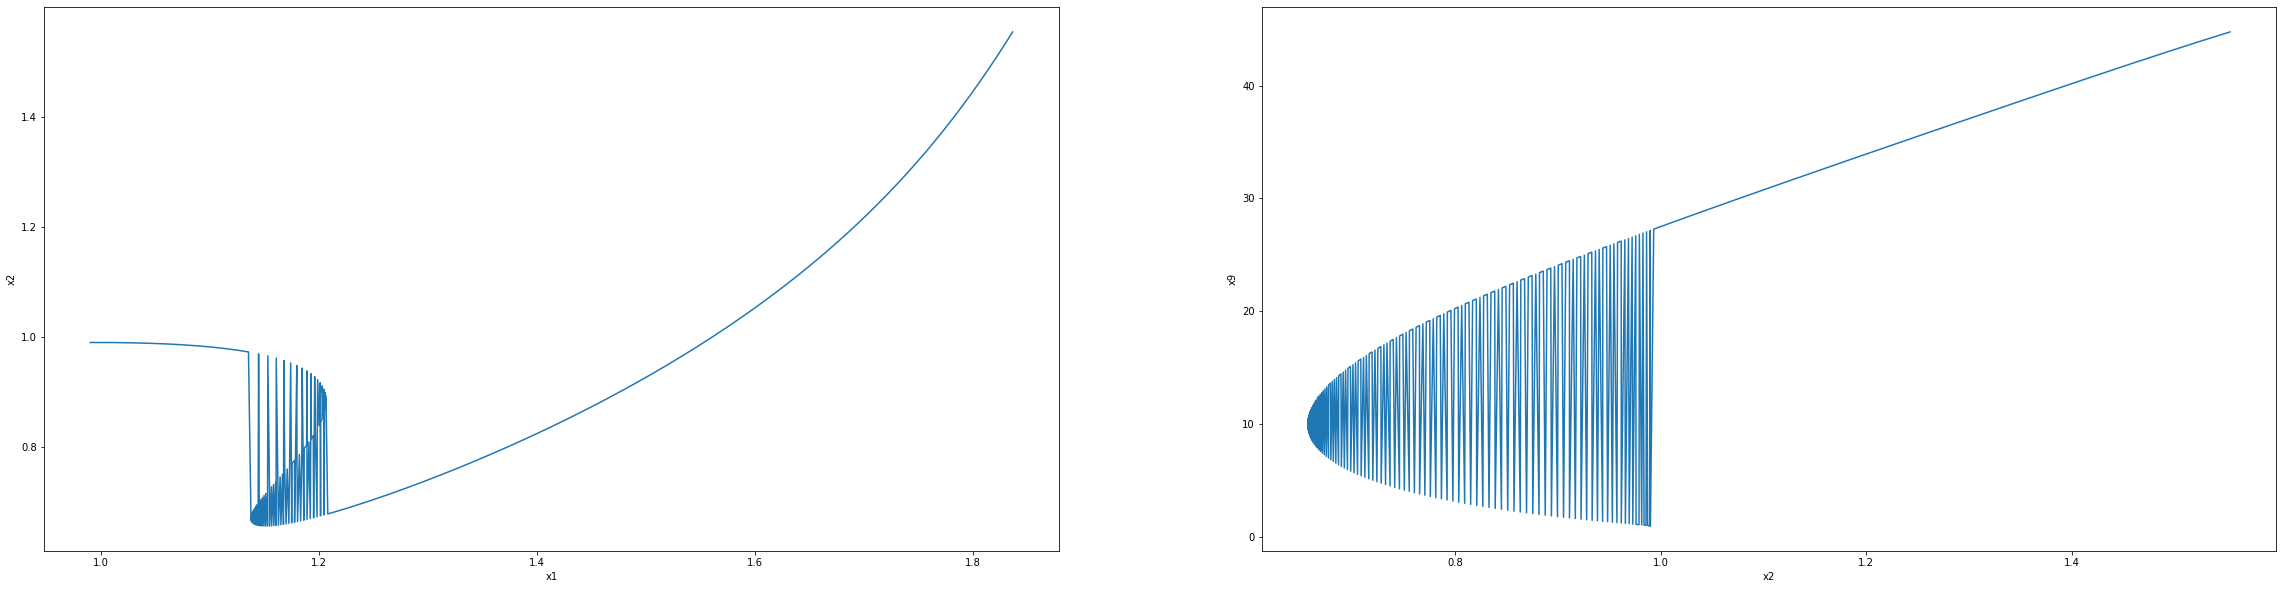

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(40,10))
sns.lineplot(data = initial, x = "x1", y = "x2", ax=ax[0])
sns.lineplot(data = initial, x = "x2", y = "x9", ax=ax[1])

This applies the cross validation to get the true repersentation of the overall loss of the model

In [8]:
kfold = Splitting([0,10,11,12,13,14,15,16,17,18], [1,2,3,4,5,6,7,8,9], num_epoches = 5, batch_size = 32, lr= 0.00005) #0.0000012 #0.00000012

In [9]:
evaluate = kfold.cross_validation_evaluate(training_df, 5)

------------- Fold 0 -------------
TEST: 0 TRAIN: [1, 2, 3, 4]
Epoch: 0  Train Loss: 0.027726195752620697 
Epoch: 1  Train Loss: 0.04375264421105385 
Epoch: 2  Train Loss: 0.024376170709729195 
Epoch: 3  Train Loss: 0.026826778426766396 
Epoch: 4  Train Loss: 0.03817899152636528 
------------- Fold 1 -------------
TEST: 1 TRAIN: [0, 2, 3, 4]
Epoch: 0  Train Loss: 0.03843354433774948 
Epoch: 1  Train Loss: 0.03262395039200783 
Epoch: 2  Train Loss: 0.02549682930111885 
Epoch: 3  Train Loss: 0.03385336697101593 
Epoch: 4  Train Loss: 0.033337876200675964 
------------- Fold 2 -------------
TEST: 2 TRAIN: [0, 1, 3, 4]
Epoch: 0  Train Loss: 0.026037266477942467 
Epoch: 1  Train Loss: 0.029877275228500366 
Epoch: 2  Train Loss: 0.0502922460436821 
Epoch: 3  Train Loss: 0.022178228944540024 
Epoch: 4  Train Loss: 0.015022016130387783 
------------- Fold 3 -------------
TEST: 3 TRAIN: [0, 1, 2, 4]
Epoch: 0  Train Loss: 0.02029019594192505 
Epoch: 1  Train Loss: 0.009774206206202507 
Epoch: 2 

In [10]:
evaluate

[tensor(0.0207, grad_fn=<MseLossBackward>),
 tensor(0.0235, grad_fn=<MseLossBackward>),
 tensor(0.0219, grad_fn=<MseLossBackward>),
 tensor(0.0242, grad_fn=<MseLossBackward>),
 tensor(0.0258, grad_fn=<MseLossBackward>)]

This is the average loss of the model

In [11]:
average_loss = 0
for x in evaluate:
    average_loss += x.item()
average_loss/len(evaluate)

0.023229636251926422

## Training set : Predictions

This is comparing the predictions made by the neural network and the training set.

## Dataframes

This is the predictions made by the neural network. This is saved an turned into a csv file

In [8]:
training_predictions = pd.DataFrame(data=pd.read_csv("../../data/preds/train/biological_model.csv"))
training_predictions.head()

,time,initial_x1,initial_x2,initial_x3,initial_x4,initial_x5,initial_x6,initial_x7,initial_x8,initial_x9,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0.00,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,1.003092,0.997164,0.975145,0.988528,0.995607,1.002248,0.997158,0.998920,0.947038
1,0.01,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,1.011640,0.996864,0.965245,0.990289,1.043762,1.029835,1.036021,1.029235,0.972248
2,0.02,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,1.024450,0.996426,0.950173,0.991760,1.106895,1.067658,1.085557,1.064729,0.990852
3,0.03,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,1.039417,0.995556,0.933928,0.993649,1.174661,1.107438,1.138926,1.104397,1.007842
4,0.04,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,1.055060,0.994521,0.917672,0.994886,1.244150,1.146945,1.193349,1.146208,1.024477


This will zip all the initial parameters within the dataframe into one columns of tuples.

In [9]:
training_predictions['initial_parameters'] = list(zip(training_predictions.initial_x1, training_predictions.initial_x2, 
                                                      training_predictions.initial_x3, 
                                                      training_predictions.initial_x4, 
                                                      training_predictions.initial_x5, 
                                                      training_predictions.initial_x6, 
                                                      training_predictions.initial_x7, 
                                                      training_predictions.initial_x8,
                                                      training_predictions.initial_x9))
training_predictions.head()

,time,initial_x1,initial_x2,initial_x3,initial_x4,initial_x5,initial_x6,initial_x7,initial_x8,initial_x9,x1,x2,x3,x4,x5,x6,x7,x8,x9,initial_parameters
0,0.00,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,1.003092,0.997164,0.975145,0.988528,0.995607,1.002248,0.997158,0.998920,0.947038,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
1,0.01,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,1.011640,0.996864,0.965245,0.990289,1.043762,1.029835,1.036021,1.029235,0.972248,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
2,0.02,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,1.024450,0.996426,0.950173,0.991760,1.106895,1.067658,1.085557,1.064729,0.990852,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
3,0.03,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,1.039417,0.995556,0.933928,0.993649,1.174661,1.107438,1.138926,1.104397,1.007842,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
4,0.04,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,1.055060,0.994521,0.917672,0.994886,1.244150,1.146945,1.193349,1.146208,1.024477,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."


This is a function to drop columns which are not needed from both the simulations and prediction data

In [10]:
def manipulate(simulations, preds, initial_parameters):
    """
        This graph is for manipulating dataframes to be able to graphs them using 
        seaborn
        Args:
            simulations : The actual simulations of the system
            preds : The predictions of the simulations of the system.
            initial_parameter : The parameters to drop.
    """
    simulations = simulations.drop(columns=initial_parameters)
    preds = preds.drop(columns=initial_parameters)
    return simulations, preds

Dropping columns we do not need from the training_df which has the simulations, and training_predictions which has the predictions of the simulations

In [11]:
graph_training, graph_predictions = manipulate(training_df, training_predictions, ["initial_x1","initial_x2","initial_x3","initial_x4","initial_x5",
                                            "initial_x6","initial_x7","initial_x8","initial_x9"])

Below we are looking at the first 5 rows of each dataframes

In [12]:
graph_training.head()

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,initial_parameters
0,0.00,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
1,0.01,1.009309,0.989901,0.970691,0.990099,1.059149,1.029955,1.044315,1.028405,1.000435,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
2,0.02,1.027462,0.989414,0.952538,0.990586,1.127983,1.069790,1.098370,1.067930,1.012382,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
3,0.03,1.044490,0.988547,0.935510,0.991453,1.196481,1.109452,1.152183,1.108493,1.025908,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
4,0.04,1.060427,0.987312,0.919573,0.992688,1.264627,1.148888,1.205770,1.150014,1.041079,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."


In [13]:
graph_predictions.head()

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,initial_parameters
0,0.00,1.003092,0.997164,0.975145,0.988528,0.995607,1.002248,0.997158,0.998920,0.947038,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
1,0.01,1.011640,0.996864,0.965245,0.990289,1.043762,1.029835,1.036021,1.029235,0.972248,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
2,0.02,1.024450,0.996426,0.950173,0.991760,1.106895,1.067658,1.085557,1.064729,0.990852,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
3,0.03,1.039417,0.995556,0.933928,0.993649,1.174661,1.107438,1.138926,1.104397,1.007842,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
4,0.04,1.055060,0.994521,0.917672,0.994886,1.244150,1.146945,1.193349,1.146208,1.024477,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."


This defines an inital set of inital parameters of x1, x2, ... x9 we want to select.

In [14]:
initial_paras_tuple = (0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.01)

The tuple above is then used to search and select all the rows corresponding to that inital set of parameters within the training and predictions dataframe. This would be used later to show the differences between the predictions and the training data.

In [15]:
initial_graph_training = graph_training[graph_training["initial_parameters"] == initial_paras_tuple]
initial_graph_predictions = graph_predictions[graph_predictions["initial_parameters"] == initial_paras_tuple]

We are looking at the first 5 rows of the dataframes

This is the simulations within the training data

In [16]:
initial_graph_training.head()

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,initial_parameters
500,0.00,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,1.010000,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
501,0.01,1.009309,0.989901,0.970691,0.990099,1.059149,1.029953,1.044315,1.028602,1.020238,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
502,0.02,1.027462,0.989414,0.952538,0.990586,1.127983,1.069783,1.098370,1.068318,1.031994,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
503,0.03,1.044490,0.988547,0.935510,0.991453,1.196481,1.109435,1.152183,1.109064,1.045335,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
504,0.04,1.060428,0.987312,0.919572,0.992688,1.264627,1.148857,1.205770,1.150763,1.060327,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."


This is the predictions of the simulations made by the neural network

In [17]:
initial_graph_predictions.head()

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,initial_parameters
500,0.00,1.006075,1.000053,0.978184,0.991581,0.998827,1.005302,1.000500,1.002785,0.949986,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
501,0.01,1.014676,0.999713,0.968196,0.993323,1.047188,1.033003,1.039364,1.033251,0.974838,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
502,0.02,1.027640,0.999256,0.953034,0.994792,1.110851,1.071195,1.089254,1.068943,0.993167,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
503,0.03,1.042657,0.998369,0.936773,0.996650,1.178804,1.111054,1.142767,1.108688,1.010135,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."
504,0.04,1.058291,0.997339,0.920507,0.997874,1.248304,1.150546,1.197190,1.150514,1.026768,"(0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9..."


## Graphs

A graph showing the predictions compared to the simulations within the training data. The neural network produced an accurate results.

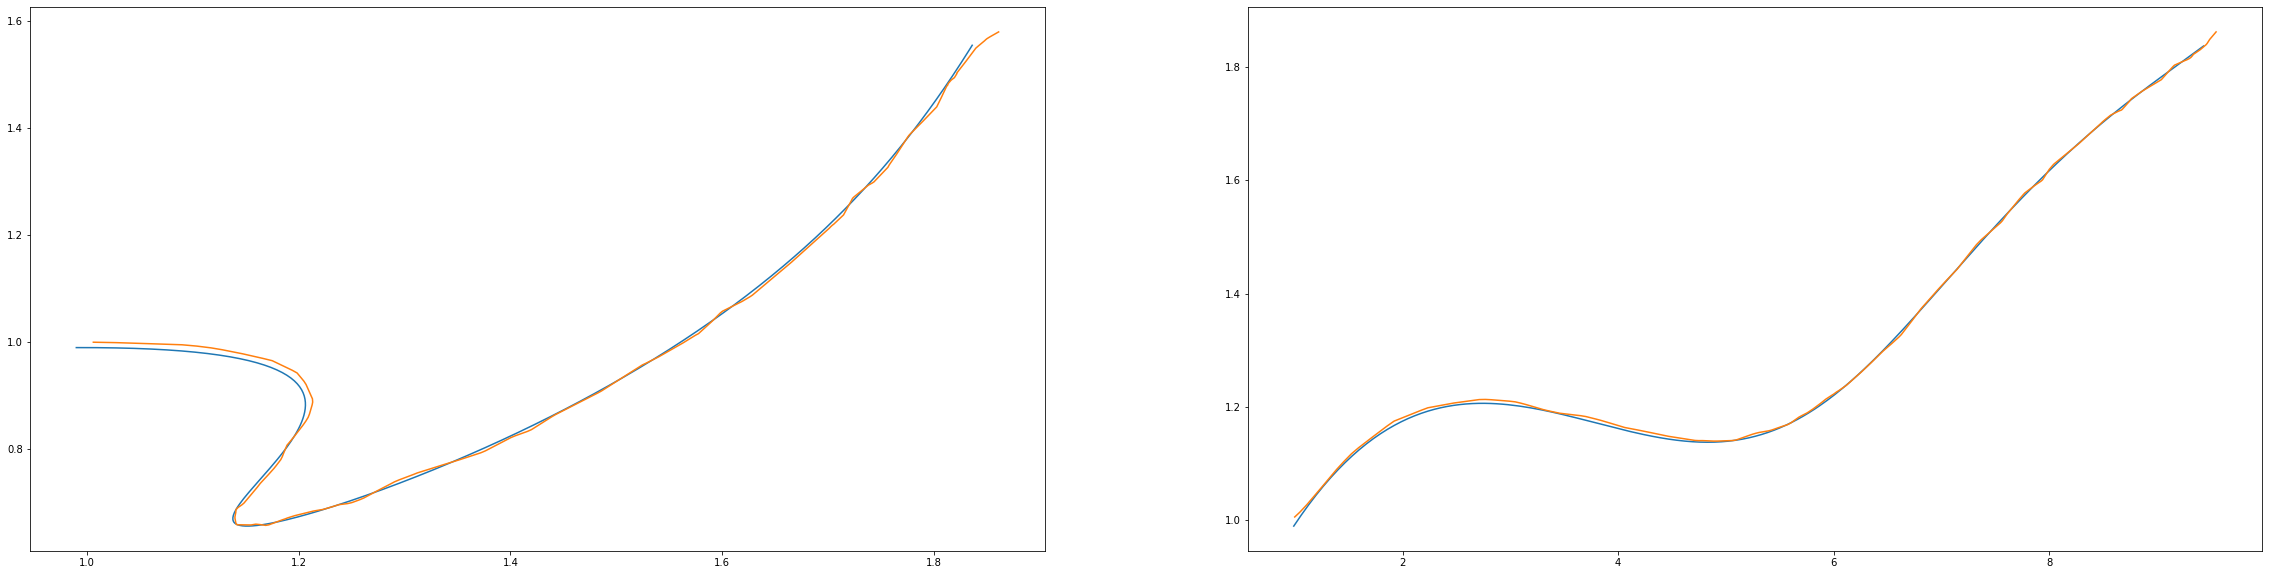

In [72]:
fig, ax = plt.subplots(ncols=2, figsize=(40,10))

ax[0].plot(initial_graph_training[["x1"]], initial_graph_training[["x2"]])
ax[0].plot(initial_graph_predictions[["x1"]], initial_graph_predictions[["x2"]])

ax[1].plot(initial_graph_training[["x5"]], initial_graph_training[["x1"]])
ax[1].plot(initial_graph_predictions[["x5"]], initial_graph_predictions[["x1"]])


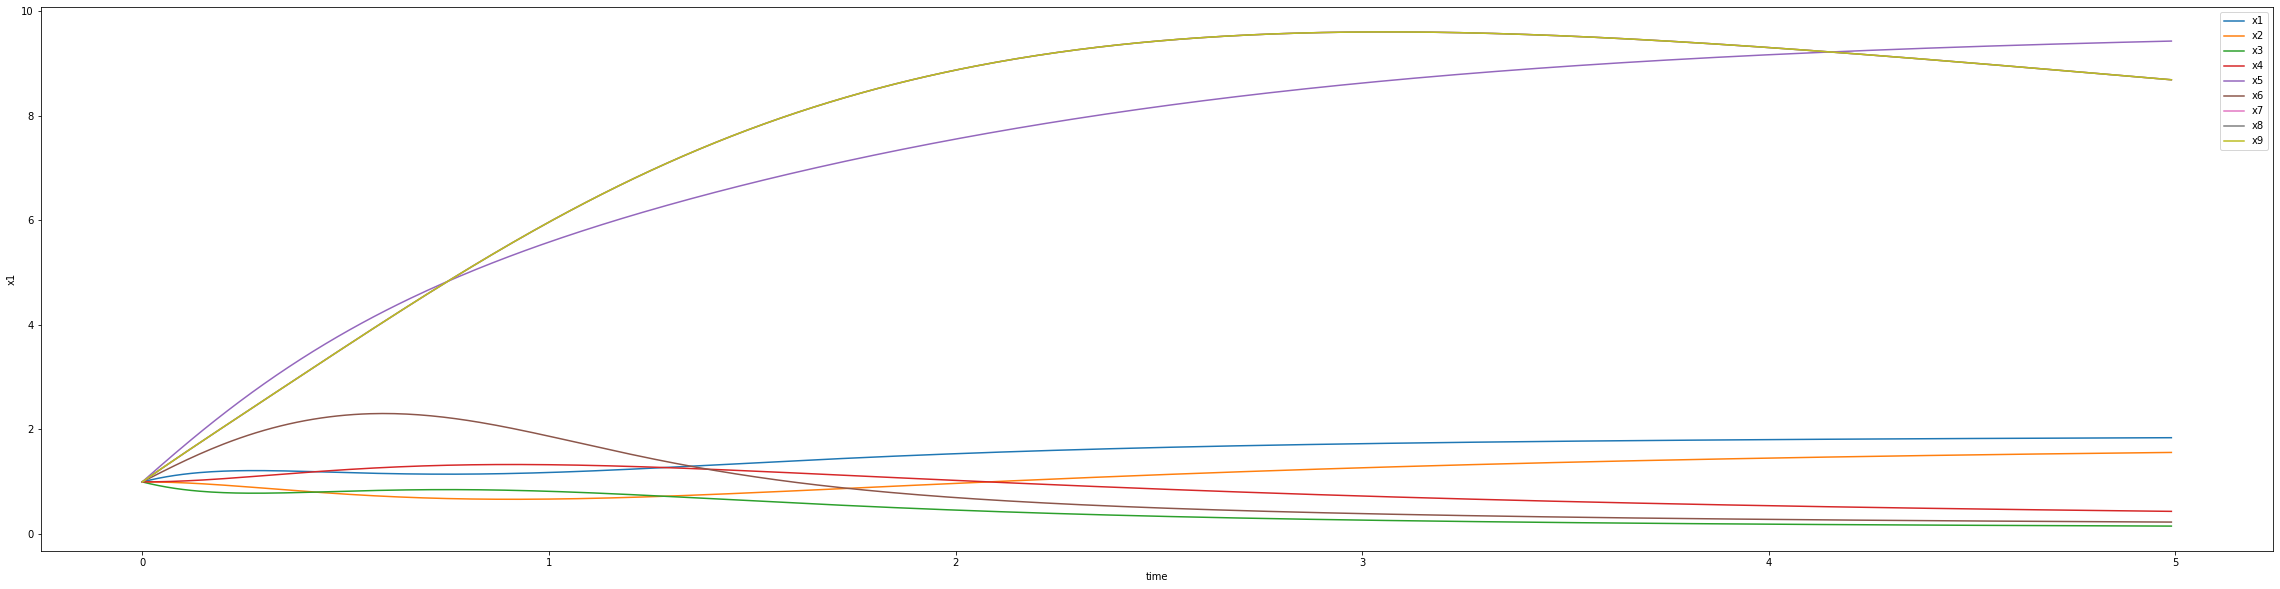

In [115]:
fig, ax = plt.subplots(figsize=(40,10))
sns.lineplot(data = initial_graph_training, x = "time", y = "x1", ax = ax,label = "x1")
sns.lineplot(data = initial_graph_training, x = "time", y = "x2", ax=ax, label = "x2")
sns.lineplot(data = initial_graph_training, x = "time", y = "x3", ax=ax, label = "x3")
sns.lineplot(data = initial_graph_training, x = "time", y = "x4", ax=ax, label = "x4")
sns.lineplot(data = initial_graph_training, x = "time", y = "x5", ax=ax, label = "x5")
sns.lineplot(data = initial_graph_training, x = "time", y = "x6", ax=ax, label = "x6")
sns.lineplot(data = initial_graph_training, x = "time", y = "x7", ax=ax, label = "x7")
sns.lineplot(data = initial_graph_training, x = "time", y = "x7", ax=ax, label = "x8")
sns.lineplot(data = initial_graph_training, x = "time", y = "x7", ax=ax, label = "x9")
ax.legend()

## Test data : Simulations

Here, we are running simulations which will be looking at the testing data. Here the testing has initial set values [1.02, 1.04] for inital parameters x1, x2, x3 .. x4

In [19]:
testing = biological_model(delta = 0.01, simulations = 5, save = False, initial_paras = np.arange(1.02, 1.04, 0.02))

This turns the initial parameters into one column of tuples

In [20]:
testing['initial_parameters'] = list(zip(testing.initial_x1, testing.initial_x2, testing.initial_x3, 
                                            testing.initial_x4, testing.initial_x5, testing.initial_x6, 
                                            testing.initial_x7, testing.initial_x8,
                                            testing.initial_x9))

This is showing the first 5 rows of the testing dataframe

In [21]:
testing.head()

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,initial_x1,initial_x2,initial_x3,initial_x4,initial_x5,initial_x6,initial_x7,initial_x8,initial_x9,initial_parameters
0,0.00,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
1,0.01,1.039592,1.019596,1.000408,1.020404,1.091241,1.059949,1.075967,1.058956,1.031366,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
2,0.02,1.057998,1.018797,0.982002,1.021203,1.162152,1.099789,1.131678,1.099062,1.044293,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
3,0.03,1.075252,1.017614,0.964748,1.022386,1.232712,1.139464,1.187152,1.140236,1.058852,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
4,0.04,1.091390,1.016058,0.948610,1.023942,1.302902,1.178920,1.242403,1.182397,1.075109,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."


## Test data : Predictions

The function defined below is used to get the predictions of the testing data

In [22]:
def testing_preds(test_df):
    inputs = torch.tensor(test_df.iloc[ :, [0,10,11,12,13,14,15,16,17,18]].values)
    targets = torch.tensor(test_df.iloc[:, [1,2,3,4,5,6,7,8,9]].values)
    preds, _ = predictions(num_inputs=10, num_classes=9, learning_rate=0.0005, batch_size=1, num_epochs=1, inputs=inputs.float(), targets=targets.float(), train=False, path= "../../data/state/biological.pth")
    data = {'time' : test_df.time.values,
            'initial_parameters' : test_df.initial_parameters.values,
            'x1' : tensor_flatten(preds[:,0]), 'x2' : tensor_flatten(preds[:, 1]), 
            'x3' : tensor_flatten(preds[:, 2]), 'x4' : tensor_flatten(preds[:, 3]),
            'x5' : tensor_flatten(preds[:, 4]), 'x6' : tensor_flatten(preds[:, 5]), 
            'x7' : tensor_flatten(preds[:, 6]), 'x8' : tensor_flatten(preds[:, 7]), 
            'x9' : tensor_flatten(preds[:, 8]),}
    return pd.DataFrame(data = data, columns = ["time", "x1", "x2", "x3", "x4", "x5", "x6", "x7","x8", "x9", "initial_parameters"]);

This is the prediction made by the testing data

In [23]:
testing_predictions = testing_preds(testing)

In [24]:
testing_predictions.head()

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,initial_parameters
0,0.00,1.030956,1.020340,0.995289,1.013591,1.036943,1.036517,1.036601,1.036053,0.978669,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
1,0.01,1.040200,1.019928,0.984597,1.015249,1.087004,1.065604,1.076377,1.067665,1.001757,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
2,0.02,1.054020,1.019333,0.968861,1.016894,1.152564,1.104841,1.127715,1.105087,1.018802,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
3,0.03,1.069228,1.018356,0.952504,1.018535,1.221140,1.144494,1.181567,1.145673,1.035469,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
4,0.04,1.084950,1.017306,0.936350,1.019641,1.290682,1.184072,1.236029,1.187743,1.052042,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."


This select the simulations which have initial parameters defined below as a tuple

In [25]:
initial_paras_tuple = (1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.04)

This code below is selecting both the data from the predictions and simulation to compare

In [26]:
initial_graph_testing = testing[testing["initial_parameters"] == initial_paras_tuple]
initial_graph_testing_preds = testing_predictions[testing_predictions["initial_parameters"] == initial_paras_tuple]

Here we are looking at the first 5 rows of both the dataframes

In [27]:
initial_graph_testing.head()

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,initial_x1,initial_x2,initial_x3,initial_x4,initial_x5,initial_x6,initial_x7,initial_x8,initial_x9,initial_parameters
0,0.00,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.040000,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.04,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
1,0.01,1.039592,1.019596,1.000408,1.020404,1.091241,1.059947,1.075967,1.059153,1.051169,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.04,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
2,0.02,1.057998,1.018797,0.982002,1.021203,1.162152,1.099780,1.131678,1.099449,1.063906,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.04,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
3,0.03,1.075252,1.017614,0.964748,1.022386,1.232712,1.139446,1.187152,1.140807,1.078280,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.04,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
4,0.04,1.091390,1.016058,0.948610,1.023942,1.302902,1.178888,1.242403,1.183145,1.094358,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.04,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."


In [28]:
initial_graph_testing_preds.head()

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,initial_parameters
500,0.00,1.034271,1.023269,0.997941,1.016657,1.041482,1.040472,1.040984,1.040027,0.981511,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
501,0.01,1.043704,1.022828,0.987045,1.018290,1.092405,1.070069,1.081274,1.071847,1.004378,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
502,0.02,1.057364,1.022178,0.971627,1.019955,1.157259,1.108758,1.132106,1.109145,1.021653,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
503,0.03,1.072533,1.021188,0.955295,1.021551,1.225643,1.148278,1.185740,1.149879,1.038046,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
504,0.04,1.088183,1.020124,0.939184,1.022629,1.294838,1.187675,1.239870,1.192050,1.054333,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."


## Graph

This is a graph of the predictions compared to the testing simulations

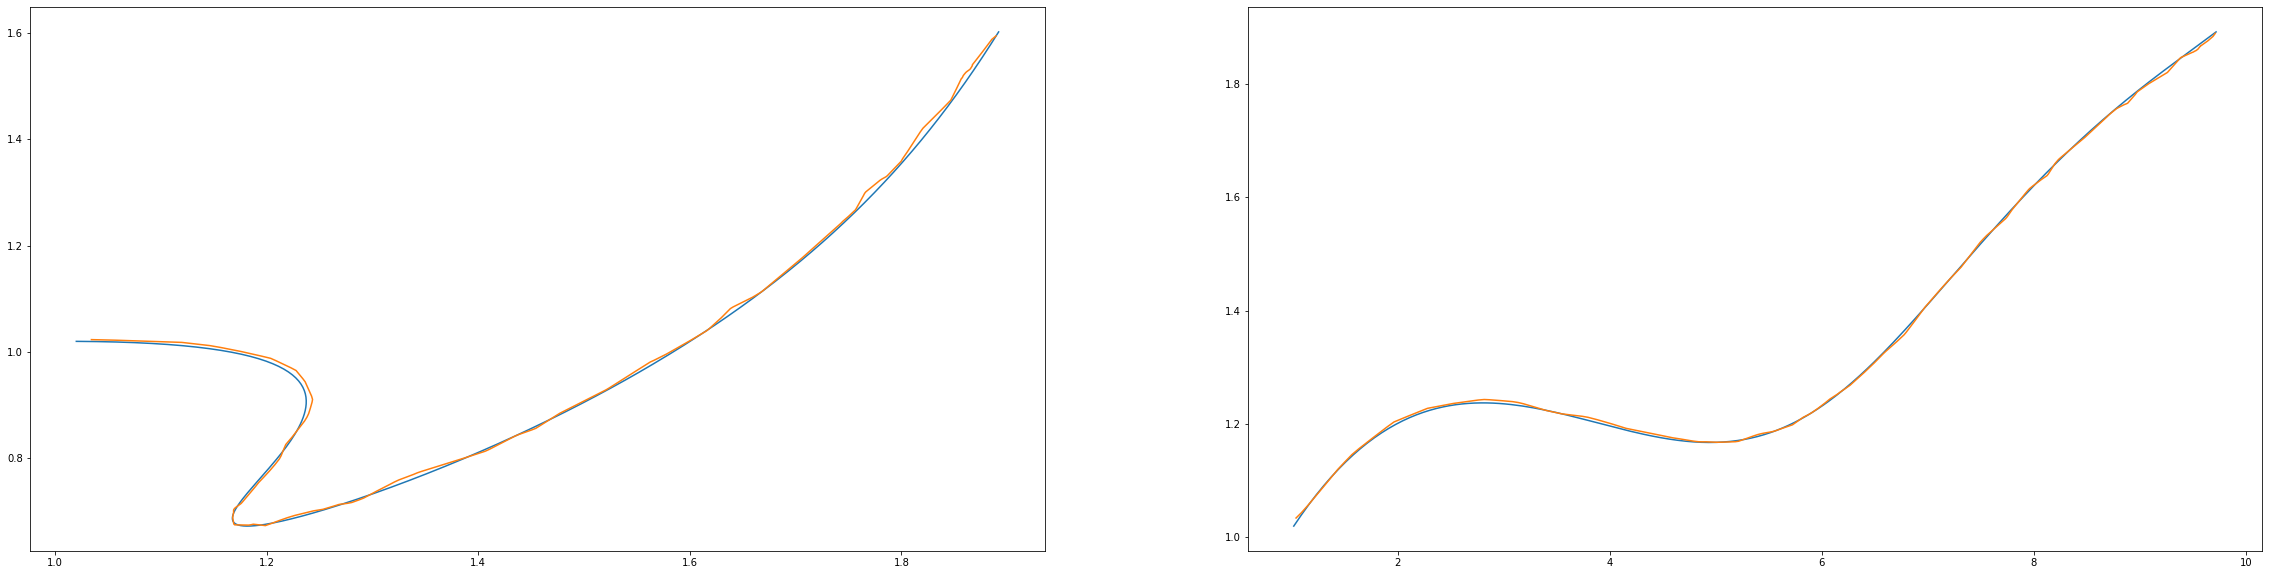

In [75]:
fig, ax = plt.subplots(ncols=2, figsize=(40,10))

ax[0].plot(initial_graph_testing[["x1"]], initial_graph_testing[["x2"]])
ax[0].plot(initial_graph_testing_preds[["x1"]], initial_graph_testing_preds[["x2"]])

ax[1].plot(initial_graph_testing[["x5"]], initial_graph_testing[["x1"]])
ax[1].plot(initial_graph_testing_preds[["x5"]], initial_graph_testing_preds[["x1"]])

### Loss by simulation

Here we are taking a look at each indivdual simulation (An individual simulation is categoried as a simulation with different initial parameters) within the testing dataframe

This is the dataframe we are analysing shown below:
    <ol>
    <li> testing - the testing simulations </li>
    <li> testing_predictions - the predictions of the testing simulations </li>
    </ol>

In [30]:
testing.head()

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,initial_x1,initial_x2,initial_x3,initial_x4,initial_x5,initial_x6,initial_x7,initial_x8,initial_x9,initial_parameters
0,0.00,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.020000,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
1,0.01,1.039592,1.019596,1.000408,1.020404,1.091241,1.059949,1.075967,1.058956,1.031366,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
2,0.02,1.057998,1.018797,0.982002,1.021203,1.162152,1.099789,1.131678,1.099062,1.044293,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
3,0.03,1.075252,1.017614,0.964748,1.022386,1.232712,1.139464,1.187152,1.140236,1.058852,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
4,0.04,1.091390,1.016058,0.948610,1.023942,1.302902,1.178920,1.242403,1.182397,1.075109,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,1.02,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."


In [53]:
len(testing)

256000

In [31]:
testing_predictions.head()

,time,x1,x2,x3,x4,x5,x6,x7,x8,x9,initial_parameters
0,0.00,1.030956,1.020340,0.995289,1.013591,1.036943,1.036517,1.036601,1.036053,0.978669,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
1,0.01,1.040200,1.019928,0.984597,1.015249,1.087004,1.065604,1.076377,1.067665,1.001757,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
2,0.02,1.054020,1.019333,0.968861,1.016894,1.152564,1.104841,1.127715,1.105087,1.018802,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
3,0.03,1.069228,1.018356,0.952504,1.018535,1.221140,1.144494,1.181567,1.145673,1.035469,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."
4,0.04,1.084950,1.017306,0.936350,1.019641,1.290682,1.184072,1.236029,1.187743,1.052042,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0..."


This is the simulationLoss functon below which allows us to calculate the loss for each simulation

In [32]:
simulationLoss, _ = lossBySimulations(testing, testing_predictions, [1,2,3,4,5,6,7,8,9])

The dataframe it provides, showing each simulation and the corresponding loss

In [33]:
simulationLoss.head()

,initial_parameters,Loss
0,1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02,0.235477
1,1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.04,0.257551
2,1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.04 1.02,0.247876
3,1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.04 1.04,0.271478
4,1.02 1.02 1.02 1.02 1.02 1.02 1.04 1.02 1.02,0.248736


This is a plot of the dataframe above

In [34]:
ranges = np.arange(0.99, 1.01, 0.02) 
initial_values = [ranges, ranges, ranges, ranges, ranges, ranges, ranges, ranges, ranges]

In [35]:
simulationLossDistance = lossBySimulationsDistance(simulationLoss, initial_values)

In [36]:
simulationLossDistance.head()

,initial_parameters,Loss,Distance
0,1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02,0.235477,5.994138
32,1.02 1.02 1.02 1.04 1.02 1.02 1.02 1.02 1.02,0.427279,6.921434
256,1.04 1.02 1.02 1.02 1.02 1.02 1.02 1.02 1.02,0.301094,6.921434
64,1.02 1.02 1.04 1.02 1.02 1.02 1.02 1.02 1.02,0.274752,6.921434
8,1.02 1.02 1.02 1.02 1.02 1.04 1.02 1.02 1.02,0.253296,6.921434


In [54]:
len(simulationLossDistance)

512

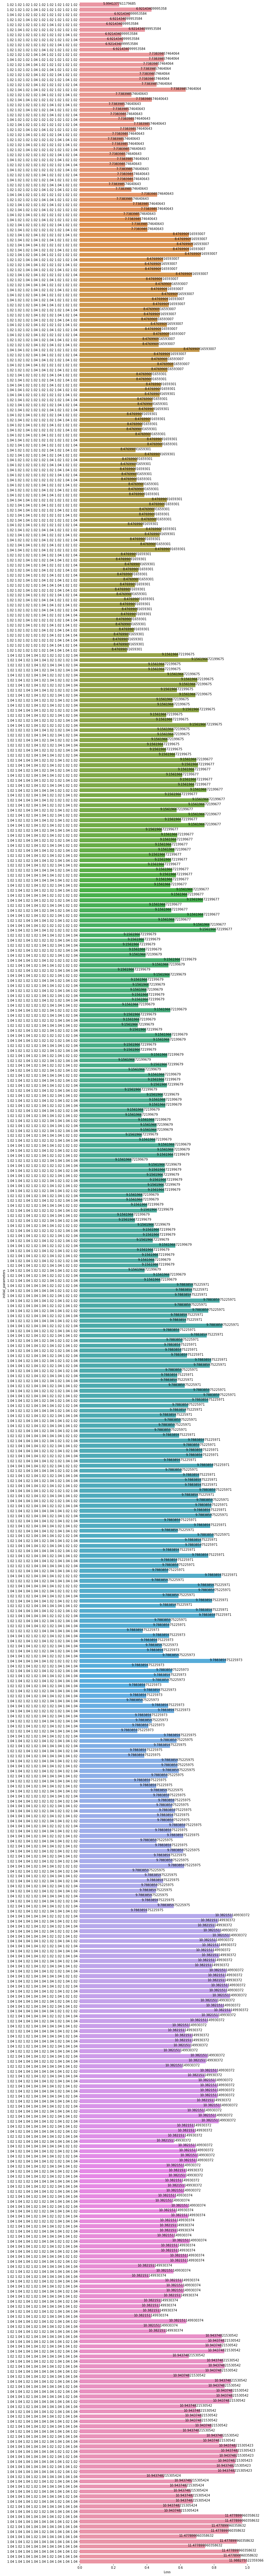

In [45]:
simulaPlots("Loss", "initial_parameters", simulationLossDistance, pos = 0.000005)

In [89]:
simulationSameDistance = simulationLossDistance.groupby("Distance").filter(lambda x: len(x) > 1).reset_index(drop = True)
simulationAverage = simulationSameDistance.groupby("Distance").mean("Loss").reset_index()
simulationMin = simulationSameDistance.groupby("Distance").min("Loss").reset_index()
simulationMax = simulationSameDistance.groupby("Distance").max("Loss").reset_index()

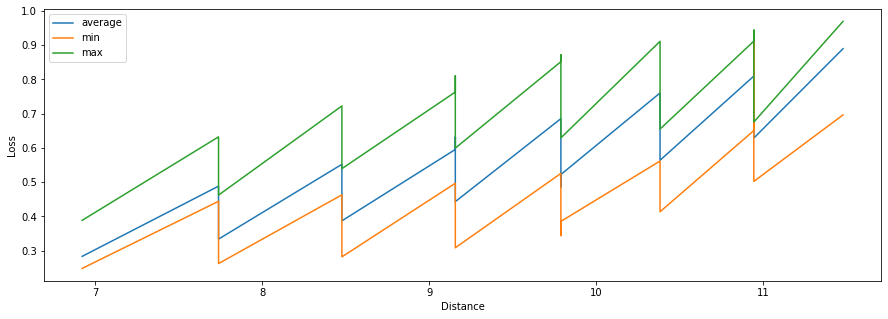

In [98]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data = simulationAverage, x = "Distance", y = "Loss", ax = ax, label = "average")
sns.lineplot(data = simulationMin, x = "Distance", y = "Loss", ax = ax, label = "min")
sns.lineplot(data = simulationMax, x = "Distance", y = "Loss", ax = ax, label = "max")
ax.legend()

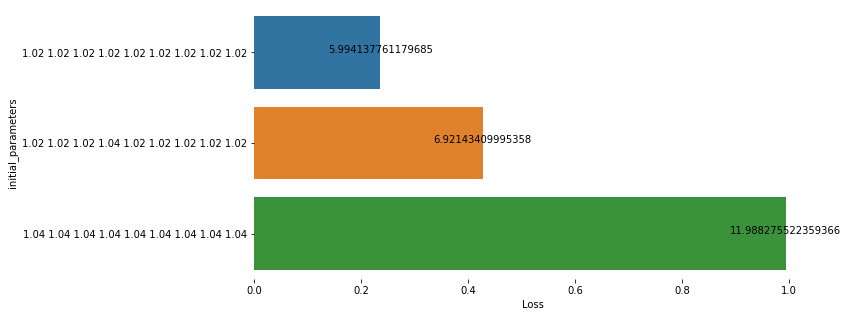

In [109]:
simulaPlots("Loss", "initial_parameters", simulationLossDistance.groupby("Distance").filter(lambda x: len(x) == 1), figsize = (10,5),  pos = 0.000005)

The lossByTime function is providing us with the loss at each individual time step within a simulation

In [46]:
timeLoss, _ = lossByTime(testing, testing_predictions, [1,2,3,4,5,6,7,8,9])

This is the dataframe it provides us; showing the time and corresponding loss for a specified initial_parameter

In [47]:
timeLoss.head()

,Time,initial_parameters,Loss
0,0.00,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0...",0.000397
1,0.01,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0...",0.000142
2,0.02,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0...",0.000114
3,0.03,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0...",0.000108
4,0.04,"(1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.02, 1.0...",0.000110


This is a figure showing individual graphs for a specific simulation demonstrating the loss at a specific time step

In [76]:
individualTimeLoss = timeLoss.groupby("Time").mean("Loss").reset_index()

<AxesSubplot:xlabel='Time', ylabel='Loss'>

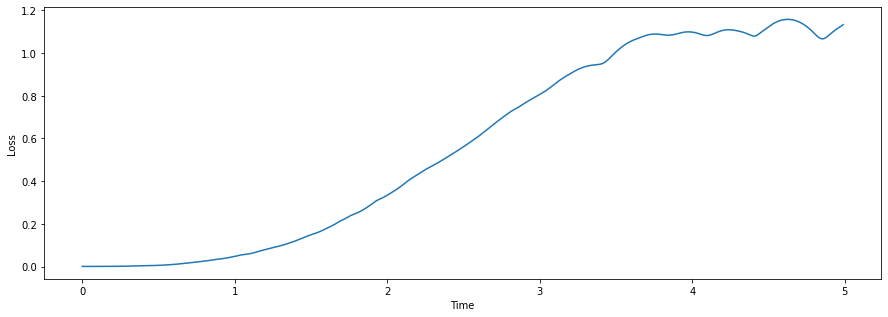

In [99]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data = individualTimeLoss, x = "Time", y = "Loss", ax=ax)

<AxesSubplot:>

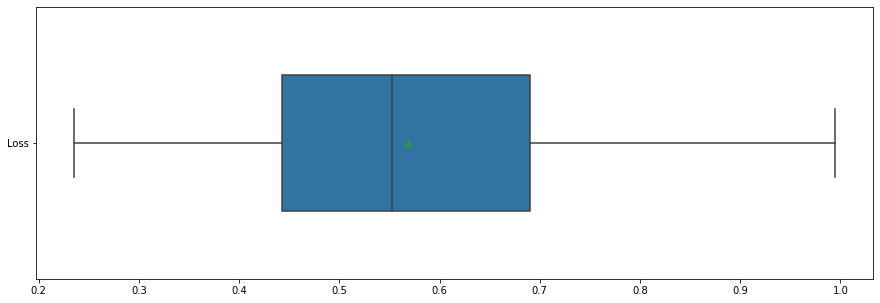

In [110]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data = simulationLossDistance[["Loss"]], showmeans=True, orient="h", width = 0.5, ax=ax)